Shape: (9994, 7)


,customer_id,segment,region,sales,profit,discount,order_date
0,CG-12520,Consumer,South,261.96,41.9136,0.0,11/8/2016
1,CG-12520,Consumer,South,731.94,219.5820,0.0,11/8/2016
2,DV-13045,Corporate,West,14.62,6.8714,0.0,6/12/2016


Missing values per column:
customer_id    0
segment        0
region         0
sales          0
profit         0
discount       0
order_date     0
dtype: int64
Filtered dataset shape: (1137, 8)


/var/folders/0l/wrnmjj2n1qj74t6j_gd9dgpw0000gn/T/ipykernel_13708/3428648464.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['customer_id', 'segment', 'region'])


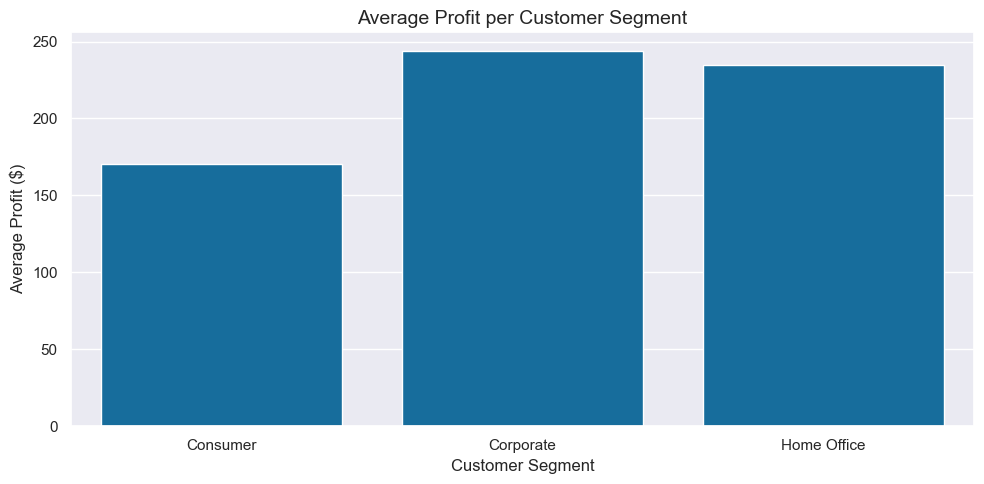

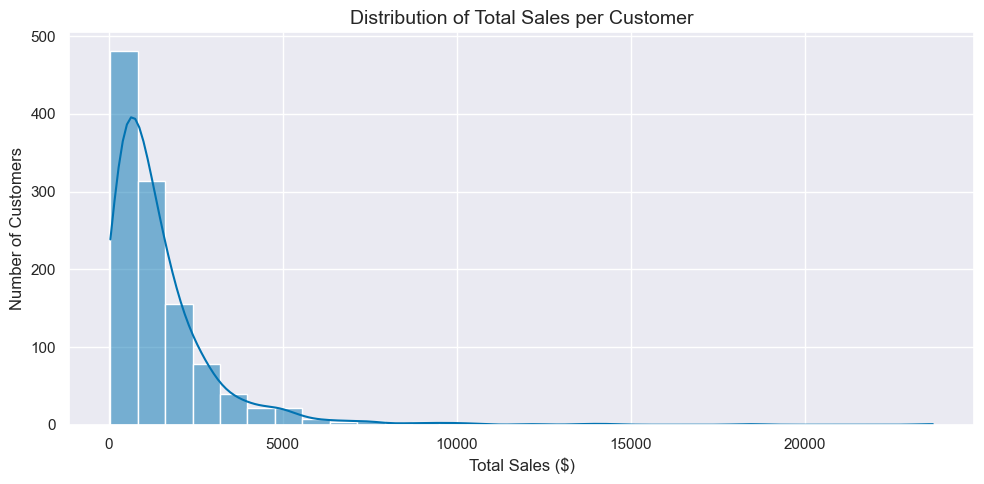

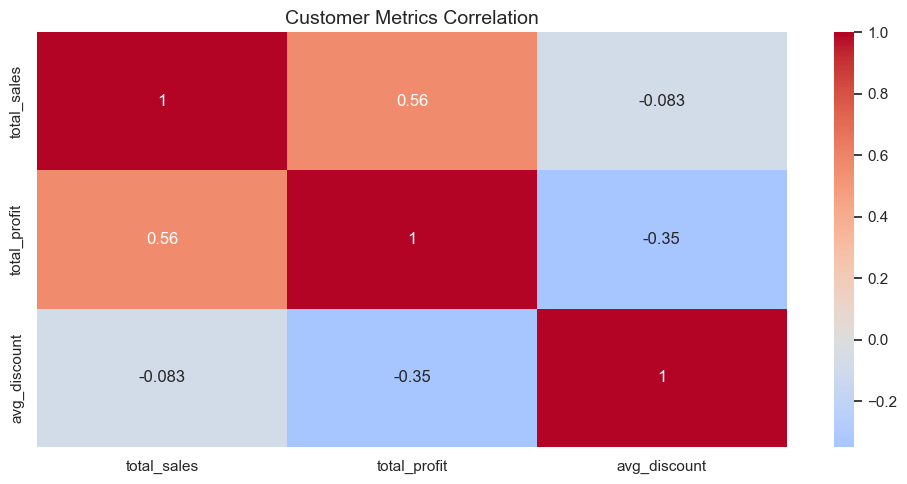

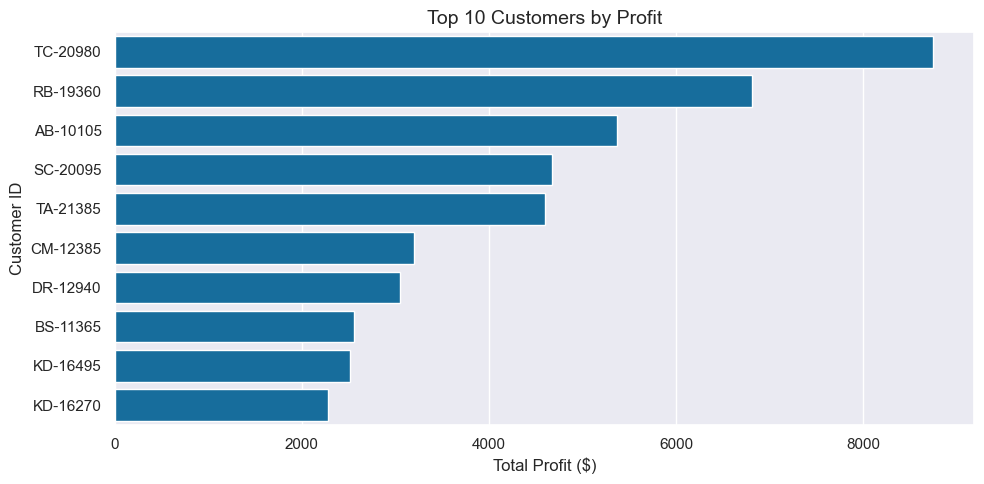

Customers analyzed: 1137
Average profit per customer: 204.32
Top segment by average profit: Corporate
Top region by total sales: West


/var/folders/0l/wrnmjj2n1qj74t6j_gd9dgpw0000gn/T/ipykernel_13708/3428648464.py:127: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Top segment by average profit:", agg.groupby('segment')['total_profit'].mean().idxmax())
/var/folders/0l/wrnmjj2n1qj74t6j_gd9dgpw0000gn/T/ipykernel_13708/3428648464.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Top region by total sales:", agg.groupby('region')['total_sales'].sum().idxmax())


In [11]:
# 🧩 Customer Segmentation — Superstore Analytics Dashboard

## 1️⃣ Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

## 2️⃣ Load & Inspect Data

df = pd.read_csv('../data/Superstore.csv', encoding='latin-1')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Focus on relevant columns
data = df[['customer_id', 'segment', 'region', 'sales', 'profit', 'discount', 'order_date']].copy()

print("Shape:", data.shape)
display(data.head(3))

## 3️⃣ Data Cleaning & Preparation

# Drop duplicates
data.drop_duplicates(inplace=True)

# Convert data types
for col in ['segment', 'region']:
    data[col] = data[col].astype('category')

for col in ['sales', 'profit', 'discount']:
    data[col] = data[col].astype('float32')

# Parse dates
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

print("Missing values per column:")
print(data.isna().sum())

## 4️⃣ Aggregation by Customer
data = data.dropna(subset=['customer_id', 'segment', 'region'])

agg = (
    data
    .groupby(['customer_id', 'segment', 'region'])
    .agg(
        orders=('order_date', 'count'),
        total_sales=('sales', 'sum'),
        total_profit=('profit', 'sum'),
        avg_discount=('discount', 'mean'),
        avg_check=('sales', 'mean')
    )
    .reset_index()
)

# Filter out low-activity customers
agg = agg.query('total_sales > 50 and orders > 3')

print(f"Filtered dataset shape: {agg.shape}")
agg.head(3)

## 5️⃣ Exploratory Data Analysis (EDA)

### 🔹 Average Profit by Segment
sns.barplot(x='segment', y='total_profit', data=agg, estimator='mean', errorbar=None)
plt.title('Average Profit per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Profit ($)')
plt.tight_layout()
plt.savefig('../output/graphs/segment_profit_bar.png')
plt.show()

# **Result:**
# - Corporate customers generate the highest average profit.
# - Consumer segment is large but less profitable per customer.
# - Home Office segment has the lowest profitability.


### 🔹 Distribution of Total Sales
sns.histplot(agg['total_sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales per Customer')
plt.xlabel('Total Sales ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('../output/graphs/segment_sales_distribution.png')
plt.show()

# **Result:**
# - Most customers have total sales below \$5,000.
# - A few outliers generate very high revenue (long tail distribution).

### 🔹 Correlation Heatmap
sns.heatmap(agg[['total_sales', 'total_profit', 'avg_discount']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Customer Metrics Correlation')
plt.tight_layout()
plt.savefig('../output/graphs/customer_corr_heatmap.png')
plt.show()

# **Result:**
# - Strong positive correlation between sales and profit.
# - Moderate negative correlation between discount and profit.
# - Indicates that excessive discounts reduce profitability.


### 🔹 Top 10 Customers by Profit
top10 = agg.sort_values('total_profit', ascending=False).head(10)
sns.barplot(y='customer_id', x='total_profit', data=top10, orient='h')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.savefig('../output/graphs/top10_customers.png')
plt.show()

# **Result:**
# - Top 10 customers contribute significantly to total profit.
# - These clients are prime targets for loyalty programs or premium offers.


## 6️⃣ Summary Metrics
print("Customers analyzed:", len(agg))
print("Average profit per customer:", round(agg['total_profit'].mean(), 2))
print("Top segment by average profit:", agg.groupby('segment')['total_profit'].mean().idxmax())
print("Top region by total sales:", agg.groupby('region')['total_sales'].sum().idxmax())


## 7️⃣ Business Insights
# - The **Corporate** segment provides the best ROI per customer.
# - **High discount usage** correlates with reduced profit margins.
# - **West region** leads in total sales; targeted campaigns here can maximize returns.
# - Focus retention efforts on **top 10 customers** who drive disproportionate revenue.


## 8️⃣ Next Steps
# - Develop a customer lifetime value (CLV) model.
# - Segment clients by profitability using KMeans or RFM analysis.
# - Build an interactive dashboard for sales & customer monitoring.

